In [7]:
import json, os
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# arima

# tensorflow
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
models = '../config/models.json'
with open(models) as data:
    models = json.load(data)

In [17]:
model_info = models['model_1']

In [18]:
model_info

{'info': 'just vitoria station data',
 'time_granularity': ['00', '03', '06', '09', '12', '15', '18', '21', '24'],
 'model_type': 'lstm',
 'dataset': 'dataset_1',
 'training_parameters': {'epochs': 100,
  'n_steps_in': 42,
  'n_steps_out': 42,
  'first_layer': 16,
  'hidden_layers': [32, 64, 32],
  'optimizer': 'adam',
  'loss': 'mse'}}

In [19]:
df = pd.read_csv('../data/datasets/{}.csv'.format(model_info['dataset']))

In [138]:
# y = df.iloc[:,1:17].to_numpy()
y = df.iloc[:,[1,7,8]].to_numpy()
x = df.iloc[:,1:].to_numpy()
steps = 8*7
features = generator[0][0].shape[2]
output_shape = y.shape[1]

In [139]:
generator = TimeseriesGenerator(x,y,steps)

In [140]:
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(steps,features)))
model.add(Dropout(0.35))
model.add(LSTM(32, activation='relu'))
model.add(Dense(output_shape))
model.compile(optimizer='adam', loss='mse')

In [141]:
history = model.fit_generator(generator,epochs=15)

Epoch 1/15
323/323 [==============================] - 23s 70ms/step - loss: 601259712.0000
Epoch 2/15
323/323 [==============================] - 23s 70ms/step - loss: 17902492.0000
Epoch 3/15
323/323 [==============================] - 23s 72ms/step - loss: 409182.2188
Epoch 4/15
323/323 [==============================] - 23s 72ms/step - loss: 25396.3750
Epoch 5/15
323/323 [==============================] - 23s 72ms/step - loss: 6422.3745
Epoch 6/15
323/323 [==============================] - 23s 70ms/step - loss: 833.7454
Epoch 7/15
323/323 [==============================] - 23s 70ms/step - loss: 2495.3882
Epoch 8/15
323/323 [==============================] - 23s 70ms/step - loss: 111.8443
Epoch 9/15
323/323 [==============================] - 23s 71ms/step - loss: 100.7070
Epoch 10/15
323/323 [==============================] - 23s 72ms/step - loss: 60.5291
Epoch 11/15
323/323 [==============================] - 23s 71ms/step - loss: 54.8743
Epoch 12/15
323/323 [==========================

In [142]:
history_2 = model.fit_generator(generator,epochs=10)

Epoch 1/10
323/323 [==============================] - 23s 71ms/step - loss: 16.2607
Epoch 2/10
323/323 [==============================] - 23s 71ms/step - loss: 15.1707
Epoch 3/10
323/323 [==============================] - 23s 72ms/step - loss: 16.0285
Epoch 4/10
323/323 [==============================] - 23s 72ms/step - loss: 13.8208
Epoch 5/10
323/323 [==============================] - 23s 71ms/step - loss: 13.8023
Epoch 6/10
323/323 [==============================] - 22s 70ms/step - loss: 19.9550
Epoch 7/10
323/323 [==============================] - 23s 70ms/step - loss: 122.8152
Epoch 8/10
323/323 [==============================] - 23s 71ms/step - loss: 41.8254
Epoch 9/10
323/323 [==============================] - 23s 71ms/step - loss: 17.3325
Epoch 10/10
323/323 [==============================] - 23s 70ms/step - loss: 13.3340


In [147]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 56, 16)            3648      
_________________________________________________________________
dropout_9 (Dropout)          (None, 56, 16)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)                6272      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 9,986
Trainable params: 9,986
Non-trainable params: 0
_________________________________________________________________


In [149]:
model_name = 'model_1'
model.save('../models/{}'.format(model_name),overwrite=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ../models/model_1/assets


In [150]:
pred = model.predict(generator[322][0])

In [155]:
pred[:,1]

array([14.321288 , 15.745313 , 19.30429  , 16.74292  , 18.355883 ,
       18.449137 , 19.468393 , 16.974682 , 14.704067 , 16.099188 ,
       15.357915 , 15.6425295, 21.399246 , 19.457596 , 19.639235 ,
        6.6872025,  6.5769205,  7.6343613, 17.070627 , 13.992482 ,
       15.6549425, 15.453539 , 14.434768 , 19.480188 , 14.446894 ,
       17.904535 , 16.073606 , 18.79073  , 19.009558 , 17.906559 ,
       17.35426  , 16.630535 , 16.158474 , 16.334778 , 16.11864  ,
       16.534739 , 20.77837  , 20.043285 , 19.801264 , 16.198927 ,
       18.365387 , 13.543623 , 13.859219 , 15.116708 , 20.101614 ,
       19.753866 , 18.557426 , 17.404993 , 12.729095 , 13.10488  ,
       13.498984 , 13.482139 , 19.599617 , 18.348864 , 16.941998 ,
       13.135945 , 13.48293  , 16.987068 , 20.202496 , 21.433384 ,
       21.153423 , 18.35542  , 17.868685 , 15.99182  , 18.115065 ,
       16.107862 , 18.203722 , 15.189851 , 20.17027  , 19.725946 ,
       19.50942  , 20.420048 , 19.784882 , 18.88075  , 17.8121

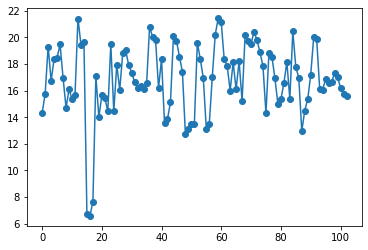

In [156]:
plt.plot(pred[:,1],'-o')